# BÀI TẬP ÔN TẬP - DATA ANALYSIS

Nội dung: Decision Analysis, Regression Model, Forecasting

## Dataset

### 1. house_prices_hcmc.csv

**Mô tả**: Dữ liệu giá nhà tại TP.HCM

**Số lượng**: 100 houses

**Cột dữ liệu**:
- House_ID: Mã nhà (H001-H100)
- District: Quận (District 1, District 2, District 7, Thu Duc)
- Area_sqm: Diện tích (m²)
- Bedrooms: Số phòng ngủ (1-5)
- Bathrooms: Số phòng tắm (1-3)
- Floor_Level: Tầng (1-7)
- Age_years: Tuổi nhà (0-30 năm)
- Distance_to_Center_km: Khoảng cách đến trung tâm (km)
- Has_Parking: Có chỗ đậu xe (Yes/No)
- Listing_Date: Ngày đăng tin
- Price_Billion_VND: Giá (tỷ VND)

### 2. monthly_sales_data.csv

**Mô tả**: Dữ liệu doanh số bán hàng theo tháng

**Thời gian**: 2020-01 đến 2024-09 (57 tháng)

**Cột dữ liệu**:
- Date: Ngày (YYYY-MM-DD)
- Year: Năm
- Month: Tháng (1-12)
- Month_Name: Tên tháng
- Quarter: Quý (Q1-Q4)
- Sales_Million_VND: Doanh số (triệu VND)
- Sales_Growth_%: Tăng trưởng (%)
- Number_of_Orders: Số đơn hàng
- New_Customers: Khách hàng mới
- Marketing_Spend_Million_VND: Chi phí marketing
- [Category]_%: Phần trăm doanh số theo danh mục

---

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')


## PHẦN 1: DECISION ANALYSIS

### Bài 1: EMV và EVPI

In [2]:
# BÀI 1: EMV và EVPI
print("\n" + "-" * 80)
print("BÀI 1: EXPECTED MONETARY VALUE VÀ EXPECTED VALUE OF PERFECT INFORMATION")
print("-" * 80)
print("Scenario: Công ty công nghệ quyết định ra mắt sản phẩm mới")
print("\nCÂU HỎI:")
print("1. Tính EMV cho mỗi quyết định")
print("2. Xác định quyết định tối ưu")
print("3. Tính EVPI")
print("4. Phân tích sensitivity với probability")
print("5. Vẽ Decision Tree\n")

decisions = ['Launch Product', 'Do Not Launch']
states = ['High Demand', 'Medium Demand', 'Low Demand']
probabilities = [0.3, 0.5, 0.2]

payoff_table = pd.DataFrame({
    'High Demand': [500, 0],
    'Medium Demand': [200, 0],
    'Low Demand': [-100, 0]
}, index=decisions)

print("PAYOFF TABLE (Triệu VND):")
print(payoff_table)




--------------------------------------------------------------------------------
BÀI 1: EXPECTED MONETARY VALUE VÀ EXPECTED VALUE OF PERFECT INFORMATION
--------------------------------------------------------------------------------
Scenario: Công ty công nghệ quyết định ra mắt sản phẩm mới

CÂU HỎI:
1. Tính EMV cho mỗi quyết định
2. Xác định quyết định tối ưu
3. Tính EVPI
4. Phân tích sensitivity với probability
5. Vẽ Decision Tree

PAYOFF TABLE (Triệu VND):
                High Demand  Medium Demand  Low Demand
Launch Product          500            200        -100
Do Not Launch             0              0           0


In [3]:
# 2. Tính EMV
emv = payoff_table.dot(probabilities)
print("\nEXPECTED MONETARY VALUE (EMV) (Triệu VND):")
print(emv)

# 2. Quyết định tối ưu
optimal = emv.idxmax()
print(f"\nQuyết định tối ưu: {optimal} (EMV = {emv[optimal]} triệu VND)")

# 3. EVPI
evpi = sum(payoff_table[s].max() * p for s, p in zip(states, probabilities)) - emv[optimal]
print(f"EVPI = {evpi} triệu VND")

# 4. Sensitivity Analysis
p_range = np.linspace(0, 1, 100)
emv_launch = [500*p + 200*(1-p)/2 - 100*(1-p)/2 for p in p_range]


EXPECTED MONETARY VALUE (EMV) (Triệu VND):
Launch Product    230.0
Do Not Launch       0.0
dtype: float64

Quyết định tối ưu: Launch Product (EMV = 230.0 triệu VND)
EVPI = 20.0 triệu VND


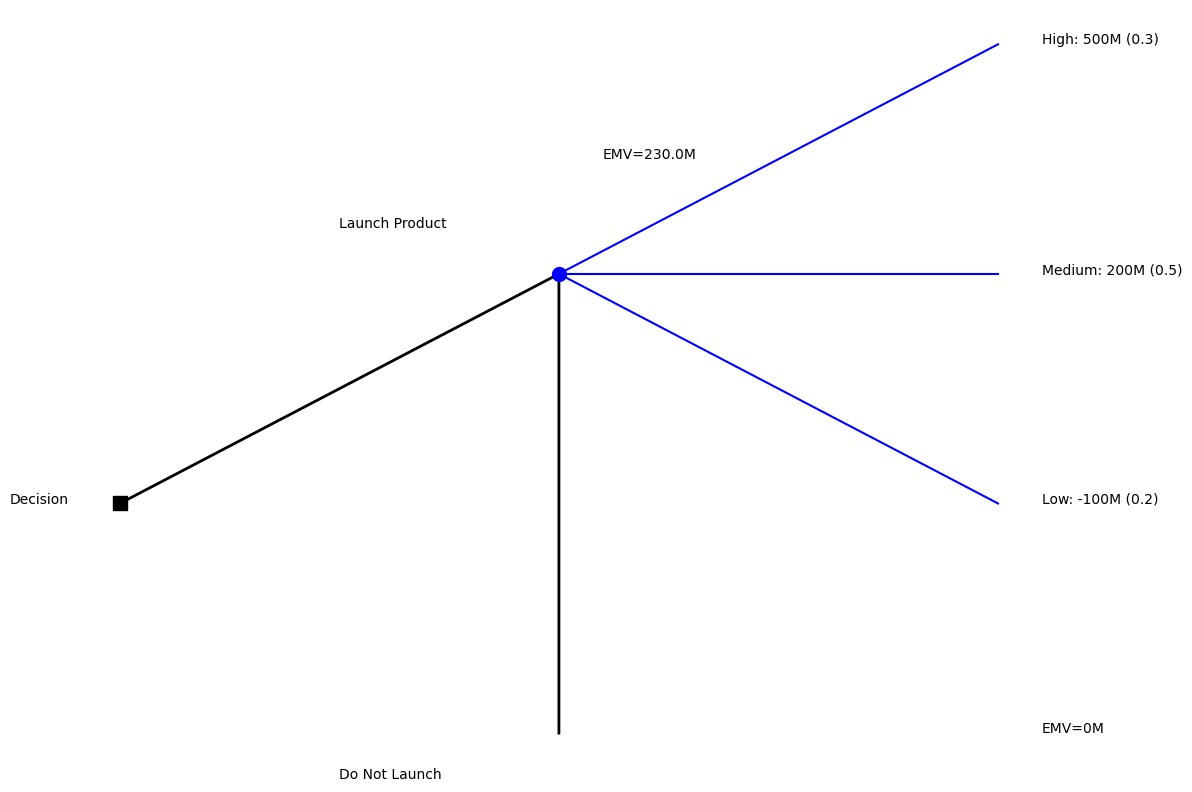

In [27]:
# 5. Decision Tree
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(0, 0, 'ks', ms=10)  # Decision node
ax.plot([0, 2, 2], [0, 1, -1], 'k-', lw=2)  # Decision branches
ax.plot(2, 1, 'bo', ms=10)  # Chance node
for i, y in enumerate([2, 1, 0]): ax.plot([2, 4], [1, y], 'b-', lw=1.5)  # Chance branches

# Labels
labels = [
    (-0.5, 0, 'Decision'),
    (1, 1.2, 'Launch Product'),
    (1, -1.2, 'Do Not Launch'),
    (2.2, 1.5, f'EMV={emv["Launch Product"]}M'),
    (4.2, 2, 'High: 500M (0.3)'),
    (4.2, 1, 'Medium: 200M (0.5)'),
    (4.2, 0, 'Low: -100M (0.2)'),
    (4.2, -1, 'EMV=0M')
]
for x, y, txt in labels: ax.text(x, y, txt, fontsize=10)

ax.axis('off')
plt.tight_layout()
plt.show()


### Bài 2: Risk-Return Trade-off

(Phần đọc thêm)

In [22]:
# BÀI 2: Risk-Return Trade-off
print("\n" + "-" * 80)
print("BÀI 2: QUYẾT ĐỊNH ĐẦU TƯ - RISK-RETURN ANALYSIS")
print("-" * 80)
print("Scenario: Nhà đầu tư chọn chiến lược đầu tư\n")

strategies = ['Aggressive', 'Moderate', 'Conservative']
market_states = ['Bull Market', 'Normal Market', 'Bear Market']
probabilities_market = [0.25, 0.50, 0.25]

returns= pd.DataFrame({
    'Bull Market': [30, 15, 8],
    'Normal Market': [10, 8, 6],
    'Bear Market': [-15, -5, 3]
}, index=strategies)

print("RETURNS TABLE (%):")
print(returns)




--------------------------------------------------------------------------------
BÀI 2: QUYẾT ĐỊNH ĐẦU TƯ - RISK-RETURN ANALYSIS
--------------------------------------------------------------------------------
Scenario: Nhà đầu tư chọn chiến lược đầu tư

RETURNS TABLE (%):
              Bull Market  Normal Market  Bear Market
Aggressive             30             10          -15
Moderate               15              8           -5
Conservative            8              6            3


In [23]:
# 1-5. Tính toán các chỉ số
rf_rate = 2
results = pd.DataFrame({
    'Expected Return (%)': {s: (returns.loc[s] * probabilities_market).sum() for s in strategies}
})

# Risk & Sharpe Ratio
results['Risk (Std Dev)'] = {s: np.sqrt(((returns.loc[s] - results.loc[s, 'Expected Return (%)'])**2 * probabilities_market).sum())
                              for s in strategies}
results['Sharpe Ratio'] = (results['Expected Return (%)'] - rf_rate) / results['Risk (Std Dev)']

# Downside Risk & Sortino Ratio
results['Downside Risk'] = {s: np.sqrt((np.minimum(0, returns.loc[s] - results.loc[s, 'Expected Return (%)'])**2 * probabilities_market).sum())
                            for s in strategies}
results['Sortino Ratio'] = results.apply(
    lambda r: (r['Expected Return (%)'] - rf_rate) / r['Downside Risk'] if r['Downside Risk'] > 0 else float('inf'),
    axis=1
)

print("\nRISK-RETURN ANALYSIS:\n", results)


RISK-RETURN ANALYSIS:
               Expected Return (%)  Risk (Std Dev)  Sharpe Ratio  \
Aggressive                   8.75       15.958932      0.422961   
Moderate                     6.50        7.228416      0.622543   
Conservative                 5.75        1.785357      2.100420   

              Downside Risk  Sortino Ratio  
Aggressive           11.875       0.568421  
Moderate              5.750       0.782609  
Conservative          1.375       2.727273  


### Bài 3: Minimax Regret

Chọn giải pháp

In [25]:
# BÀI 3: Minimax Regret
print("\n" + "-" * 80)
print("BÀI 3: MINIMAX REGRET - QUYẾT ĐỊNH TỒN KHO")
print("-" * 80)

stock_decisions = ['Order 100', 'Order 200', 'Order 300']
demand_scenarios = ['Low (100)', 'Medium (200)', 'High (300)']

profits= pd.DataFrame({
    'Low (100)': [50, 30, 10],
    'Medium (200)': [50, 100, 80],
    'High (300)': [50, 100, 150]
}, index=stock_decisions)

print("PROFIT TABLE:")
print(profits)



--------------------------------------------------------------------------------
BÀI 3: MINIMAX REGRET - QUYẾT ĐỊNH TỒN KHO
--------------------------------------------------------------------------------
PROFIT TABLE:
           Low (100)  Medium (200)  High (300)
Order 100         50            50          50
Order 200         30           100         100
Order 300         10            80         150


In [26]:
# Tính Regret Table
regrets = profits.apply(lambda col: col.max() - col)

# Tính các tiêu chí quyết định
max_regrets = regrets.max(axis=1)
criteria = pd.DataFrame({
    'Maximax': profits.max(axis=1),
    'Maximin': profits.min(axis=1),
    'Laplace': profits.mean(axis=1),
    'Minimax Regret': -max_regrets
})

# Kết quả quyết định
minimax_decision = max_regrets.idxmin()
print(f"Minimax Regret Decision: {minimax_decision} (Regret: {max_regrets.min()})")
print(f"\nDecision Criteria:\n{criteria}")


Minimax Regret Decision: Order 300 (Regret: 40)

Decision Criteria:
           Maximax  Maximin    Laplace  Minimax Regret
Order 100       50       50  50.000000            -100
Order 200      100       30  76.666667             -50
Order 300      150       10  80.000000             -40


### Bài 4: Bayesian Analysis

Survey or not?

In [ ]:
# BÀI 4: Bayesian Analysis
print("\n" + "-" * 80)
print("BÀI 4: BAYESIAN ANALYSIS - MARKET RESEARCH")
print("-" * 80)

prior = {'Success': 0.4, 'Failure': 0.6}
conditional = {
    'Success': {'Favorable': 0.8, 'Unfavorable': 0.2},
    'Failure': {'Favorable': 0.3, 'Unfavorable': 0.7}
}

print("PRIOR PROBABILITIES:")
for state, prob in prior.items():
    print(f"  P({state}) = {prob}")

# Joint Probabilities
joint = {}
for state in prior:
    for survey in ['Favorable', 'Unfavorable']:
        joint[(survey, state)] = prior[state] * conditional[state][survey]

# Posterior (Bayes Theorem)
marginal_fav = sum(joint[('Favorable', s)] for s in prior)
posterior_fav = {s: joint[('Favorable', s)] / marginal_fav for s in prior}

print("\nPOSTERIOR (Given Favorable Survey):")
for state, prob in posterior_fav.items():
    print(f"  P({state} | Favorable) = {prob:.3f}")


In [ ]:
# YOUR CODE HERE

### Bài 5: Multi-Criteria Decision

In [5]:
# BÀI 5: Multi-Criteria Decision
print("\n" + "-" * 80)
print("BÀI 5: MULTI-CRITERIA DECISION ANALYSIS - LỰA CHỌN NHÀ CUNG CẤP")
print("-" * 80)

suppliers = ['Supplier A', 'Supplier B', 'Supplier C']
criteria = ['Price', 'Quality', 'Delivery', 'Service']
weights = {'Price': 0.35, 'Quality': 0.30, 'Delivery': 0.20, 'Service': 0.15}

scores = pd.DataFrame({
    'Price': [8, 6, 7],
    'Quality': [7, 9, 8],
    'Delivery': [6, 8, 9],
    'Service': [9, 7, 6]
}, index=suppliers)




--------------------------------------------------------------------------------
BÀI 5: MULTI-CRITERIA DECISION ANALYSIS - LỰA CHỌN NHÀ CUNG CẤP
--------------------------------------------------------------------------------


In [6]:

# Tính điểm số có trọng số
weighted_scores = scores.copy()
for criterion in criteria:
    weighted_scores[criterion] = scores[criterion] * weights[criterion]

# Tổng điểm cho từng nhà cung cấp
weighted_scores['Total Score'] = weighted_scores.sum(axis=1)

# Nhà cung cấp tốt nhất
best_supplier = weighted_scores['Total Score'].idxmax()
best_score = weighted_scores['Total Score'].max()

# In kết quả
print("\nBẢNG ĐIỂM CÓ TRỌNG SỐ:")
print(weighted_scores)
print(f"\n Nhà cung cấp tốt nhất: {best_supplier} với tổng điểm: {best_score:.2f}")


BẢNG ĐIỂM CÓ TRỌNG SỐ:
            Price  Quality  Delivery  Service  Total Score
Supplier A   2.80      2.1       1.2     1.35         7.45
Supplier B   2.10      2.7       1.6     1.05         7.45
Supplier C   2.45      2.4       1.8     0.90         7.55

 Nhà cung cấp tốt nhất: Supplier C với tổng điểm: 7.55


## PHẦN 2: REGRESSION MODEL


### BÀI 6: Simple Linear Regression

Xây dựng mô hình hồi quy dự đoán giá nhà theo diện tích. Đánh giá mô hình vừa xây dựng

In [9]:
import numpy as np
import statsmodels.api as sm
df = pd.read_csv("house_prices_hcmc.csv")
X =  df['Area_sqm']
y = df['Price_Billion_VND']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Price_Billion_VND   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     423.5
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           2.36e-37
Time:                        18:47:22   Log-Likelihood:                -161.89
No. Observations:                 100   AIC:                             327.8
Df Residuals:                      98   BIC:                             333.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2055      0.307     13.713      0.0

### Bài 7: Multiple Regression

Xây dựng mô hình dự đoán giá nhà dựa trên nhiều thuộc tính định lượng khác nhau. Đánh giá mô hình vừa xây dựng

In [ ]:
print(df.dtypes)

In [10]:
dat_trung = ['Area_sqm', 'Bedrooms', 'Bathrooms', 'Floor_Level', 'Age_years', 'Distance_to_Center_km']
X = df[dat_trung]
y = df['Price_Billion_VND']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Price_Billion_VND   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     114.5
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           1.01e-40
Time:                        18:47:25   Log-Likelihood:                -139.14
No. Observations:                 100   AIC:                             292.3
Df Residuals:                      93   BIC:                             310.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.57

### Bài 8: Polynomial Regression

So sánh các dạng mô hình: tuyến tính, bậc 2, bậc 3 với nhau

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['Area_sqm']])
mo_hinh = LinearRegression().fit(X_poly,df['Price_Billion_VND'])
print("hệ số hồi quy: ",mo_hinh.coef_)
print("Intercept : ",mo_hinh.intercept_ )

hệ số hồi quy:  [0.00000000e+00 4.71163842e-02 2.20005611e-05]
Intercept :  4.4328182368764075


### Bài 9: Categorical Variables

Xây dựng mô hình hồi quy sử dụng thêm các biến định tính

In [12]:
import statsmodels.formula.api as smf

model = smf.ols('Price_Billion_VND ~ Area_sqm + Bedrooms + District + Has_Parking', data=df).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Price_Billion_VND   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     214.8
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           3.19e-52
Time:                        18:47:29   Log-Likelihood:                -110.55
No. Observations:                 100   AIC:                             235.1
Df Residuals:                      93   BIC:                             253.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

### Bài 10: Feature Selection

Hãy so sánh 3 mô hình dự đoán giá nhà dựa vào các thuộc tính sau đây:
- 'Model 1': ['Area_sqm'],
- 'Model 2': ['Area_sqm', 'Bedrooms'],
- 'Model 3': ['Area_sqm', 'Bedrooms', 'Distance_km', 'Age_years'],

In [13]:
# YOUR CODE HERE

## PHẦN 3: FORECASTING

Sử dụng dataset Monthly Sales tính.

### Bài 11: Moving Average

So sánh 3 phương pháp dự đoán khác nhau: `Naive`, M`oving Average(window=3)`, `Moving Average(window=6)`

In [14]:
df = pd.read_csv("monthly_sales_data.csv")
df.sort_values("Date",inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print("Dữ liệu doanh số theo tháng:")
print(df.head(3))

Dữ liệu doanh số theo tháng:
            Year  Month Month_Name  Quarter  Sales_Million_VND  \
Date                                                             
2020-01-01  2020      1    January        1             104.97   
2020-02-01  2020      2   February        1             115.40   
2020-03-01  2020      3      March        1             136.03   

            Sales_Growth_%  Number_of_Orders  New_Customers  \
Date                                                          
2020-01-01             NaN                40             11   
2020-02-01            9.94                48             15   
2020-03-01           17.88                59             18   

            Marketing_Spend_Million_VND  Electronics_%  Fashion_%  \
Date                                                                
2020-01-01                        13.30           21.7       15.9   
2020-02-01                        17.08           18.2       16.7   
2020-03-01                        21.43         

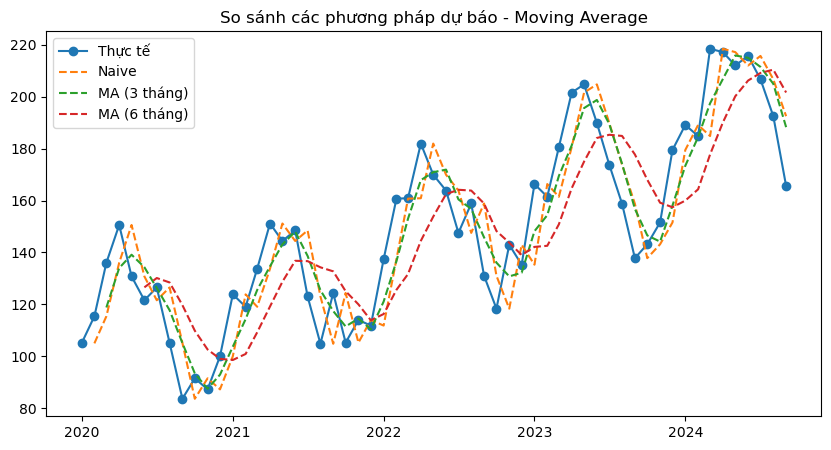

In [15]:

# Phương pháp Naive: Dự báo kỳ sau = giá trị kỳ trước
df['Naive'] = df['Sales_Million_VND'].shift(1)

# Moving Average với window = 3 và 6
df['MA_3'] = df['Sales_Million_VND'].rolling(window=3).mean()
df['MA_6'] = df['Sales_Million_VND'].rolling(window=6).mean()

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10,5))
plt.plot(df['Sales_Million_VND'], label='Thực tế', marker='o')
plt.plot(df['Naive'], label='Naive', linestyle='--')
plt.plot(df['MA_3'], label='MA (3 tháng)', linestyle='--')
plt.plot(df['MA_6'], label='MA (6 tháng)', linestyle='--')
plt.title("So sánh các phương pháp dự báo - Moving Average")
plt.legend()
plt.show()



### Bài 12: Exponential Smoothing

Sử dụng phương pháp Exponential Smoothing, tìm alpha tối ưu

🔹 Alpha tối ưu (giá trị làm sai số nhỏ nhất): 0.9


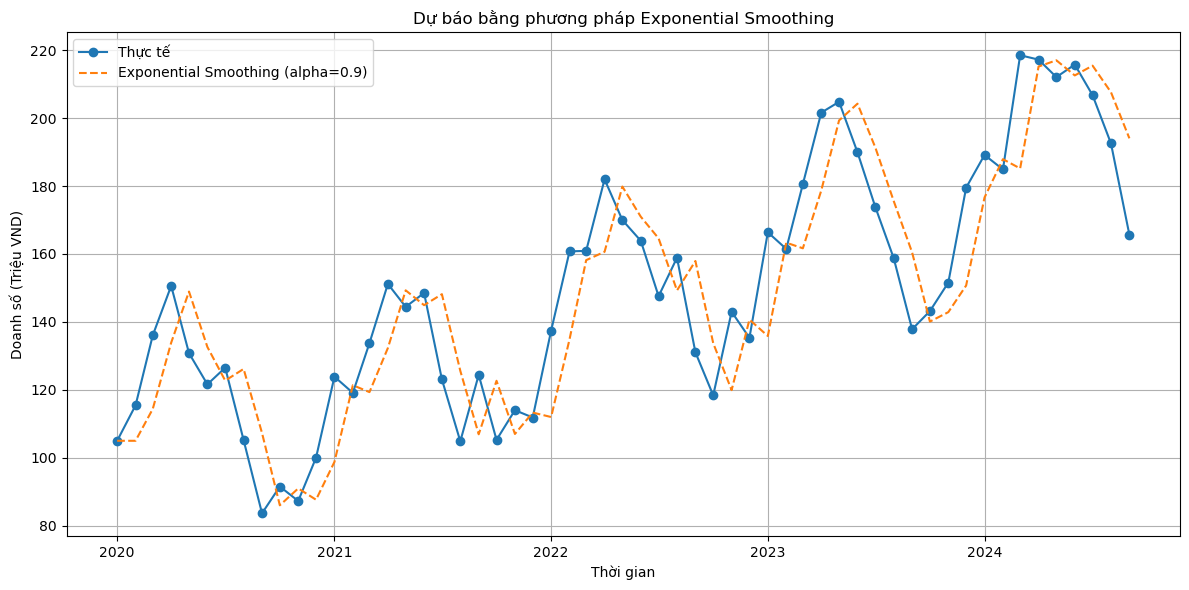

In [21]:

import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error

# Đảm bảo index có kiểu thời gian và tần suất rõ ràng
df.index = pd.to_datetime(df.index)
df.index.freq = 'MS'  # Giả sử dữ liệu theo tháng, bắt đầu từ đầu tháng

# Tìm alpha tối ưu
alphas = np.linspace(0.1, 0.9, 9)
errors = []

for alpha in alphas:
    model = SimpleExpSmoothing(df['Sales_Million_VND']).fit(smoothing_level=alpha, optimized=False)
    fitted = model.fittedvalues
    df[f'ES_{alpha:.1f}'] = fitted
    mae = mean_absolute_error(df['Sales_Million_VND'][1:], fitted[1:])  # Bỏ giá trị đầu tiên
    errors.append(mae)

# Chọn alpha tốt nhất
best_alpha = alphas[np.argmin(errors)]
print(f"🔹 Alpha tối ưu (giá trị làm sai số nhỏ nhất): {best_alpha:.1f}")

# Dự báo với alpha tối ưu
model_best = SimpleExpSmoothing(df['Sales_Million_VND']).fit(smoothing_level=best_alpha, optimized=False)
df['Exponential_Smoothing'] = model_best.fittedvalues

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(df['Sales_Million_VND'], label='Thực tế', marker='o')
plt.plot(df['Exponential_Smoothing'], label=f'Exponential Smoothing (alpha={best_alpha:.1f})', linestyle='--')
plt.title("Dự báo bằng phương pháp Exponential Smoothing")
plt.xlabel("Thời gian")
plt.ylabel("Doanh số (Triệu VND)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Bài 13: Trend Analysis

Xây dựng đường xu hướng, và đánh giá

Phương trình xu hướng: Sales = 101.09 + 1.67 * t


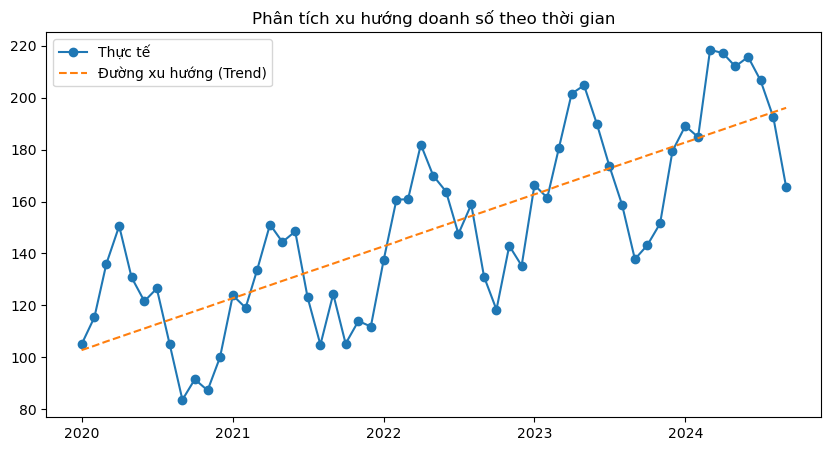

In [17]:
df['t'] = np.arange(1, len(df) + 1)

# Hồi quy tuyến tính: Sales = a + b*t
model_trend = LinearRegression()
model_trend.fit(df[['t']], df['Sales_Million_VND'])
df['Trend'] = model_trend.predict(df[['t']])

print(f"Phương trình xu hướng: Sales = {model_trend.intercept_:.2f} + {model_trend.coef_[0]:.2f} * t")

# Vẽ biểu đồ xu hướng
plt.figure(figsize=(10,5))
plt.plot(df['Sales_Million_VND'], label='Thực tế', marker='o')
plt.plot(df['Trend'], label='Đường xu hướng (Trend)', linestyle='--')
plt.title("Phân tích xu hướng doanh số theo thời gian")
plt.legend()
plt.show()

### Bài 14: Forecast Accuracy

Sử dung các độ đo khác nhau, đánh giá 3 phương pháp: `Naive`, `Moving Average` và `Trend`

In [18]:
def metrics(actual, predicted):
    # Loại bỏ các hàng bị NaN (nếu có)
    mask = (~actual.isna()) & (~predicted.isna())
    actual = actual[mask]
    predicted = predicted[mask]
    
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return mae, rmse

methods = {
    'Naive': df['Naive'],
    'MA_3': df['MA_3'],
    'MA_6': df['MA_6'],
    'Exponential_Smoothing': df['Exponential_Smoothing'],
    'Trend': df['Trend']
}

print(f"{'Phương pháp':<25}{'MAE':>10}{'RMSE':>15}")
print("-"*50)

for name, pred in methods.items():
    mae, rmse = metrics(df['Sales_Million_VND'], pred)
    print(f"{name:<25}{mae:>10.2f}{rmse:>15.2f}")


Phương pháp                     MAE           RMSE
--------------------------------------------------
Naive                         14.23          16.55
MA_3                          10.63          12.79
MA_6                          19.36          22.53
Exponential_Smoothing         14.02          16.65
Trend                         18.80          22.19


---